# **1 Analysis Data**

In [1]:
#1 data availability
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [2]:
df.shape

(5110, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Statistics of Categorical and Numerical Data

In [7]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [8]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [9]:
# handling missing values
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
#3 spelling check - in data where and all string is there need to spelling check.
df["gender"].unique()				

array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [13]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [14]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [15]:
# df.reset_index(inplace=True)
#We are removing id column (run only once)

df.drop("id", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# **2 EDA**

In [16]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

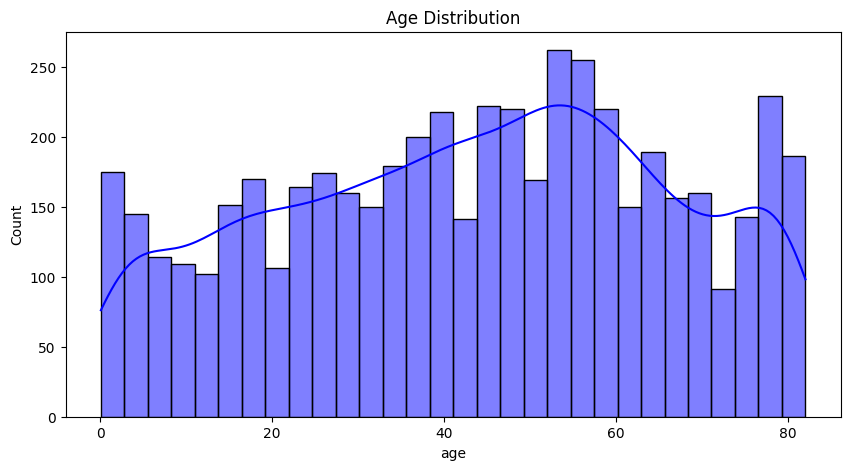

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.show()

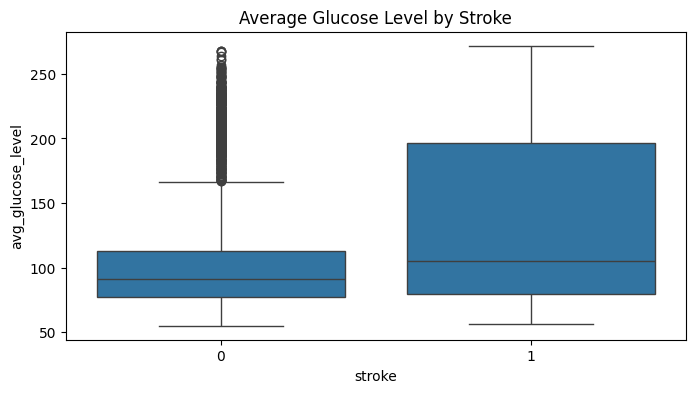

In [18]:
# Target vs Feature
plt.figure(figsize=(8, 4))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Average Glucose Level by Stroke')
plt.show()

DATA TRANSFORMATION

In [19]:
#Change the object into int for the list of columns gender, ever_married, work_type, Residence_type, smoking_status
df["gender"] = df["gender"].map({"Male":0, "Female":1, "Other":2})
df["ever_married"] = df["ever_married"].map({"Yes":0, "No":1})
df["work_type"] = df["work_type"].map({"Private":0, "Self-employed":1,"Govt_job":2,"children":3,"Self-Never_worked":4})
df["Residence_type"] = df["Residence_type"].map({"Urban":0, "Rural":1})
df["smoking_status"] = df["smoking_status"].map({"formerly smoked":0, "never smoked":1, "smokes":2, "Unknown":3})

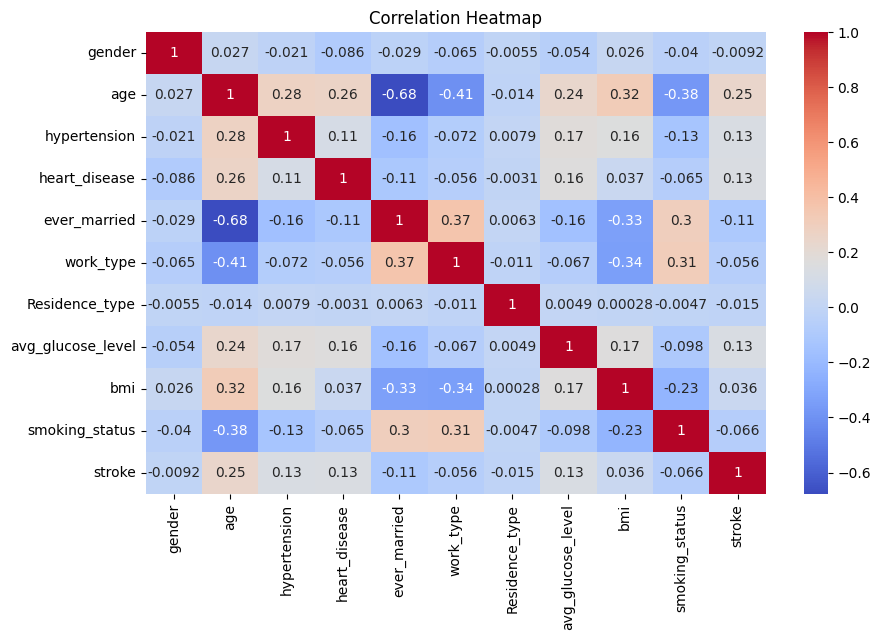

In [20]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
## binning of numerical variables

df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,0,67.0,0,1,0,0.0,0,228.69,36.6,0,1,Obesity,Elderly,High
1,1,61.0,0,0,0,1.0,1,202.21,28.1,1,1,Overweight,Elderly,High
2,0,80.0,0,1,0,0.0,1,105.92,32.5,1,1,Obesity,Elderly,Normal
3,1,49.0,0,0,0,0.0,0,171.23,34.4,2,1,Obesity,Mid Adults,High
4,1,79.0,1,0,0,1.0,1,174.12,24.0,1,1,Ideal,Elderly,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,0,0.0,0,83.75,28.1,1,0,Overweight,Elderly,Low
5106,1,81.0,0,0,0,1.0,0,125.20,40.0,1,0,Obesity,Elderly,Normal
5107,1,35.0,0,0,0,1.0,1,82.99,30.6,1,0,Obesity,Adults,Low
5108,0,51.0,0,0,0,0.0,1,166.29,25.6,0,0,Overweight,Mid Adults,High


Using the binned columns (bmi_cat, age_cat, and glucose_cat), we can perform various EDA techniques to understand the distribution, relationships, and insights within the data.

1. Univariate Analysis
Distribution of Categories


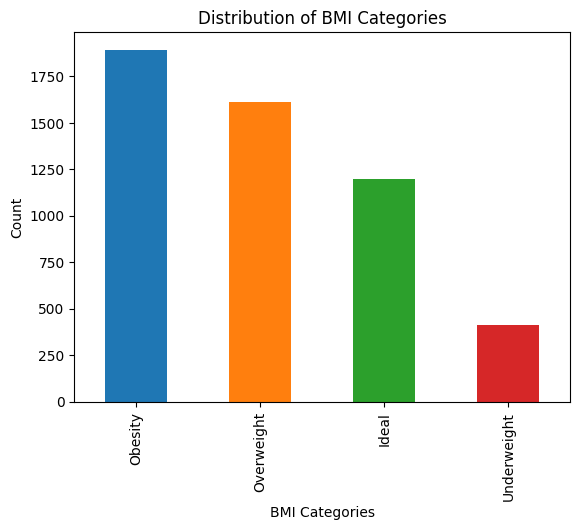

In [22]:
# BMI Categories
df['bmi_cat'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Distribution of BMI Categories')
plt.ylabel('Count')
plt.xlabel('BMI Categories')
plt.show()

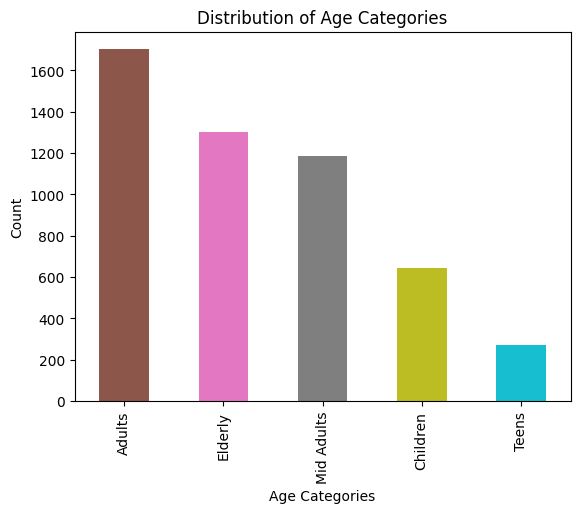

In [23]:
# Age Categories
df['age_cat'].value_counts().plot(kind='bar', color=['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.title('Distribution of Age Categories')
plt.ylabel('Count')
plt.xlabel('Age Categories')
plt.show()

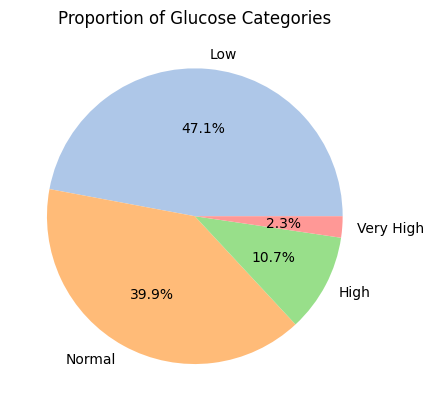

In [24]:
# Glucose Categories
df['glucose_cat'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#aec7e8', '#ffbb78', '#98df8a', '#ff9896'])
plt.title('Proportion of Glucose Categories')
plt.ylabel('')
plt.show()

2. Bivariate Analysis
BMI vs Stroke


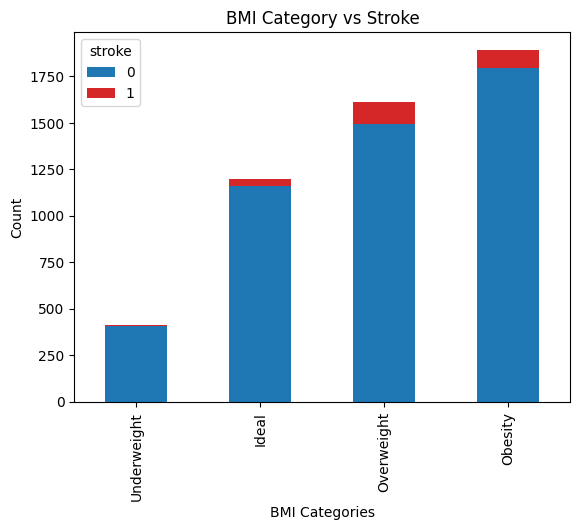

In [25]:
# Analyze the relationship between bmi_cat and the target variable, e.g., stroke
pd.crosstab(df['bmi_cat'], df['stroke']).plot(kind='bar', stacked=True, color=['#1f77b4', '#d62728'])
plt.title('BMI Category vs Stroke')
plt.xlabel('BMI Categories')
plt.ylabel('Count')
plt.show()

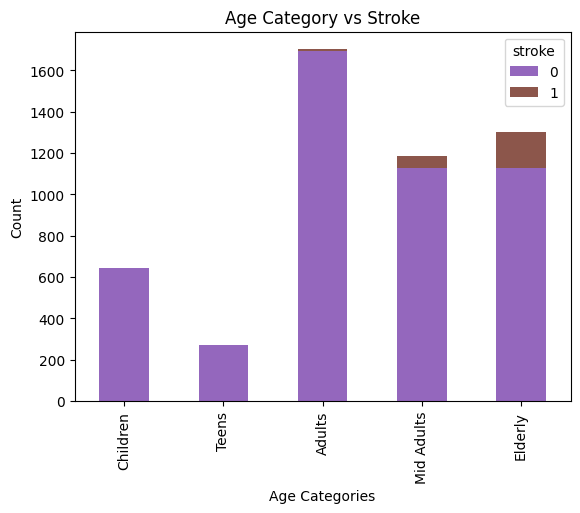

In [26]:
# Age vs Stroke
# Relationship between age_cat and stroke

pd.crosstab(df['age_cat'], df['stroke']).plot(kind='bar', stacked=True, color=['#9467bd', '#8c564b'])
plt.title('Age Category vs Stroke')
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.show()

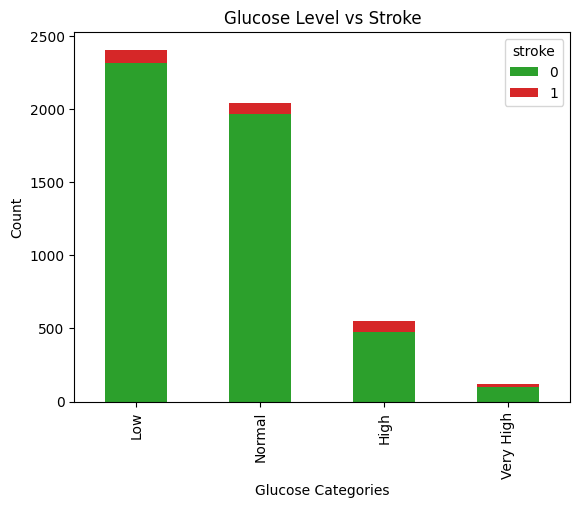

In [27]:
# Glucose vs Stroke
# Relationship between glucose_cat and stroke
pd.crosstab(df['glucose_cat'], df['stroke']).plot(kind='bar', stacked=True, color=['#2ca02c', '#d62728'])
plt.title('Glucose Level vs Stroke')
plt.xlabel('Glucose Categories')
plt.ylabel('Count')
plt.show()

3. Multivariate Analysis
Combination of BMI, Age, and Glucose Categories

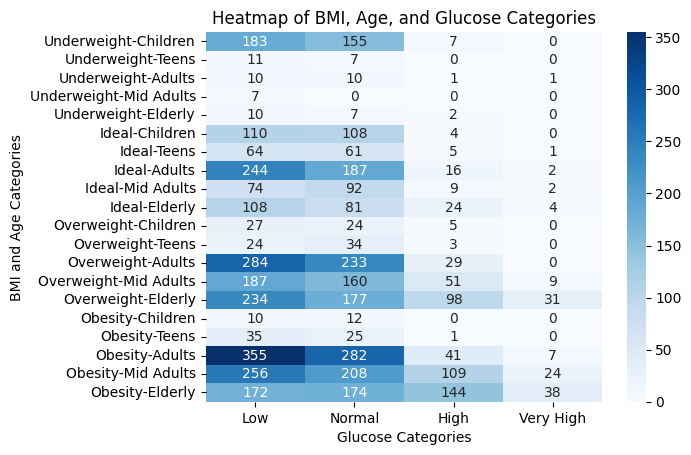

In [28]:
# Analyze how combinations of categories affect the target variable (stroke)
sns.heatmap(pd.crosstab(index=[df['bmi_cat'], df['age_cat']], columns=df['glucose_cat']), cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of BMI, Age, and Glucose Categories')
plt.xlabel('Glucose Categories')
plt.ylabel('BMI and Age Categories')
plt.show()

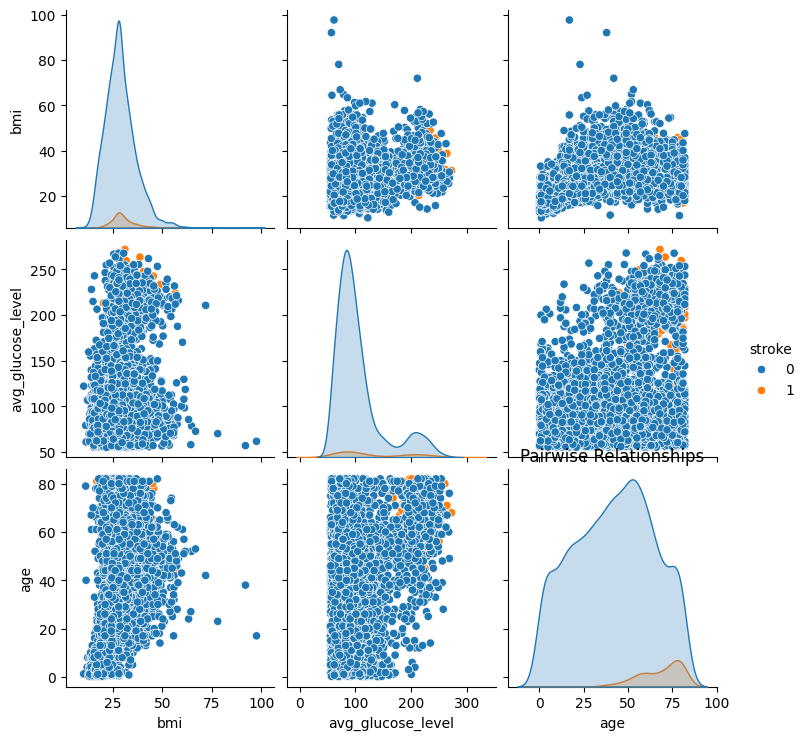

In [29]:
# Pairwise Relationships
# Use pair plots to analyze the relationships:
sns.pairplot(df, hue='stroke', vars=['bmi', 'avg_glucose_level', 'age'])
plt.title('Pairwise Relationships')
plt.show()

4. Insights
BMI: Majority of strokes might be concentrated in overweight/obese categories.
Age: Older age groups (e.g., Mid Adults and Elderly) likely show higher stroke counts.
Glucose: High/very high glucose levels could indicate a correlation with stroke incidents.
These visualizations and analyses can help draw actionable insights about risk factors for strokes.

# **3 Train and Test**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   int64   
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   int64   
 3   heart_disease      5110 non-null   int64   
 4   ever_married       5110 non-null   int64   
 5   work_type          5088 non-null   float64 
 6   Residence_type     5110 non-null   int64   
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                5110 non-null   float64 
 9   smoking_status     5110 non-null   int64   
 10  stroke             5110 non-null   int64   
 11  bmi_cat            5110 non-null   category
 12  age_cat            5110 non-null   category
 13  glucose_cat        5110 non-null   category
dtypes: category(3), float64(4), int64(7)
memory usage: 454.8 KB


In [31]:
# Corrected code
x = df.drop(["stroke", "bmi_cat", "age_cat", "glucose_cat"], axis=1)
y = df["stroke"]  # Replace 'quality' with the correct target column name

x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,0,0.0,0,228.69,36.6,0
1,1,61.0,0,0,0,1.0,1,202.21,28.1,1
2,0,80.0,0,1,0,0.0,1,105.92,32.5,1
3,1,49.0,0,0,0,0.0,0,171.23,34.4,2
4,1,79.0,1,0,0,1.0,1,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,0,0.0,0,83.75,28.1,1
5106,1,81.0,0,0,0,1.0,0,125.20,40.0,1
5107,1,35.0,0,0,0,1.0,1,82.99,30.6,1
5108,0,51.0,0,0,0,0.0,1,166.29,25.6,0


In [32]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [33]:
#one hot encoding

from keras.utils import to_categorical
y=to_categorical(y)

In [34]:
df["stroke"].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: stroke, dtype: int64

In [35]:
y[0:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [36]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,0,0.0,0,228.69,36.6,0
1,1,61.0,0,0,0,1.0,1,202.21,28.1,1
2,0,80.0,0,1,0,0.0,1,105.92,32.5,1
3,1,49.0,0,0,0,0.0,0,171.23,34.4,2
4,1,79.0,1,0,0,1.0,1,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,0,0.0,0,83.75,28.1,1
5106,1,81.0,0,0,0,1.0,0,125.20,40.0,1
5107,1,35.0,0,0,0,1.0,1,82.99,30.6,1
5108,0,51.0,0,0,0,0.0,1,166.29,25.6,0


In [38]:
# pip install scikit-learn 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x_scaler = scaler.transform(x)

x_scaler_df = pd.DataFrame(x_scaler, columns = x.columns)
x_scaler_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,-1.189511,1.051434,-0.328602,4.185032,-0.723884,-0.748358,-0.984080,2.706375,1.005086,-1.451388
1,0.839328,0.786070,-0.328602,-0.238947,-0.723884,0.159521,1.016178,2.121559,-0.098981,-0.535985
2,-1.189511,1.626390,-0.328602,4.185032,-0.723884,-0.748358,1.016178,-0.005028,0.472536,-0.535985
3,0.839328,0.255342,-0.328602,-0.238947,-0.723884,-0.748358,-0.984080,1.437358,0.719327,0.379417
4,0.839328,1.582163,3.043196,-0.238947,-0.723884,0.159521,1.016178,1.501184,-0.631531,-0.535985
...,...,...,...,...,...,...,...,...,...,...
5105,0.839328,1.626390,3.043196,-0.238947,-0.723884,-0.748358,-0.984080,-0.494658,-0.098981,-0.535985
5106,0.839328,1.670617,-0.328602,-0.238947,-0.723884,0.159521,-0.984080,0.420775,1.446713,-0.535985
5107,0.839328,-0.363842,-0.328602,-0.238947,-0.723884,0.159521,1.016178,-0.511443,0.225745,-0.535985
5108,-1.189511,0.343796,-0.328602,-0.238947,-0.723884,-0.748358,1.016178,1.328257,-0.423706,-1.451388


In [39]:
# DATA SPLIT
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler_df, y, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4088, 10), (1022, 10), (4088, 2), (1022, 2))

# **4 DEEP LEARNING**

In [ ]:

from tensorflow.keras.optimizers import SGD

In [40]:
import tensorflow as tf
dir(tf.keras.metrics)

['AUC',
 'Accuracy',
 'BinaryAccuracy',
 'BinaryCrossentropy',
 'BinaryIoU',
 'CategoricalAccuracy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'F1Score',
 'FBetaScore',
 'FalseNegatives',
 'FalsePositives',
 'Hinge',
 'IoU',
 'KLD',
 'KLDivergence',
 'LogCoshError',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'Mean',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanIoU',
 'MeanMetricWrapper',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'Metric',
 'OneHotIoU',
 'OneHotMeanIoU',
 'Poisson',
 'Precision',
 'PrecisionAtRecall',
 'R2Score',
 'Recall',
 'RecallAtPrecision',
 'RootMeanSquaredError',
 'SensitivityAtSpecificity',
 'SparseCategoricalAccuracy',
 'SparseCategoricalCrossentropy',
 'SparseTopKCategoricalAccuracy',
 'SpecificityAtSensitivity',
 'SquaredHinge',
 'Sum',
 'TopKCategoricalAccuracy',
 'TrueNegatives',
 'TruePositives',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',


In [ ]:
#inputlayer = 12 > 
    # hiddenlayer1 =512(activation="tanh") > 
    # hiddenlayer2 =256(activation="swish") 
    # hiddenlayer3 =64(activation="elu") 
    # outputlayer = 7 (activation="softmax")

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
model=Sequential()
model.add(Dense(512,input_dim=12, activation="tanh"))
model.add(Dense(350,input_dim=12, activation="tanh"))
model.add(Dense(256,input_dim=12, activation="tanh"))
model.add(Dense(180,input_dim=12, activation="tanh"))
model.add(Dense(128,input_dim=12, activation="tanh"))
model.add(Dense(64,input_dim=12, activation="tanh"))
model.add(Dense(7, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

d:\I-P\Data_Science\Studies\Project\brain_stroke_prediction_NLP\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 350)            │       179,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        89,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 180)            │        46,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        23,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354,201 (1.35 MB)

 Trainable params: 354,201 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
print(x_train.shape)  # Should return (n_samples, 12)

(4088, 10)


In [ ]:
result=model.fit(x_train, y_train, epochs=50, validation_split=0.12, batch_size=16)

In [ ]:
result.history

In [ ]:
result_history_df = pd.DataFrame(result.history)
result_history_df

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 101), result_history_df["accuracy"], label="train accuracy")
plt.plot(range(1, 101), result_history_df["val_accuracy"], label="train val accuracy")
plt.legend()
plt.show()

# **5 NLP**

In [ ]:
# I'm taking one of the stroke images and determining where the blood clot occurred.

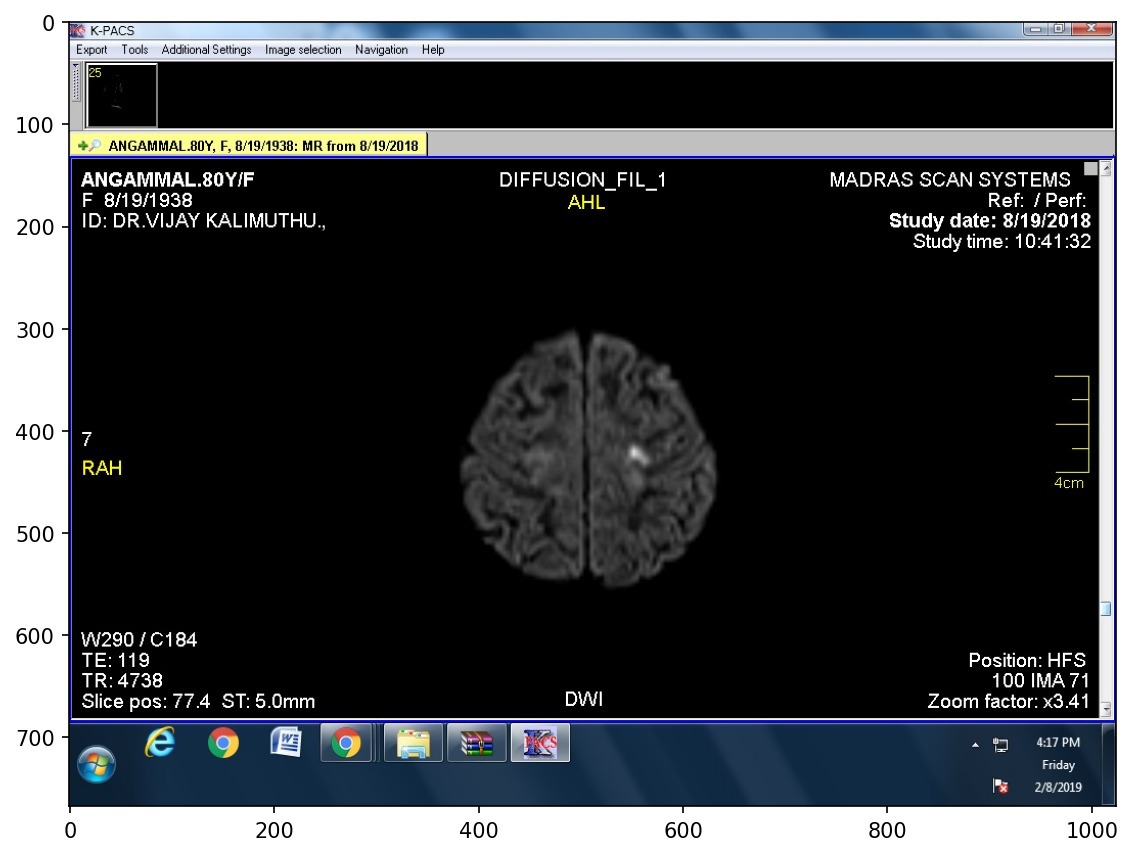

In [46]:
import matplotlib.pyplot as plt
img=plt.imread("1.jpg")
plt.figure(figsize=(9,9), dpi=150)
plt.imshow(img)
plt.show()

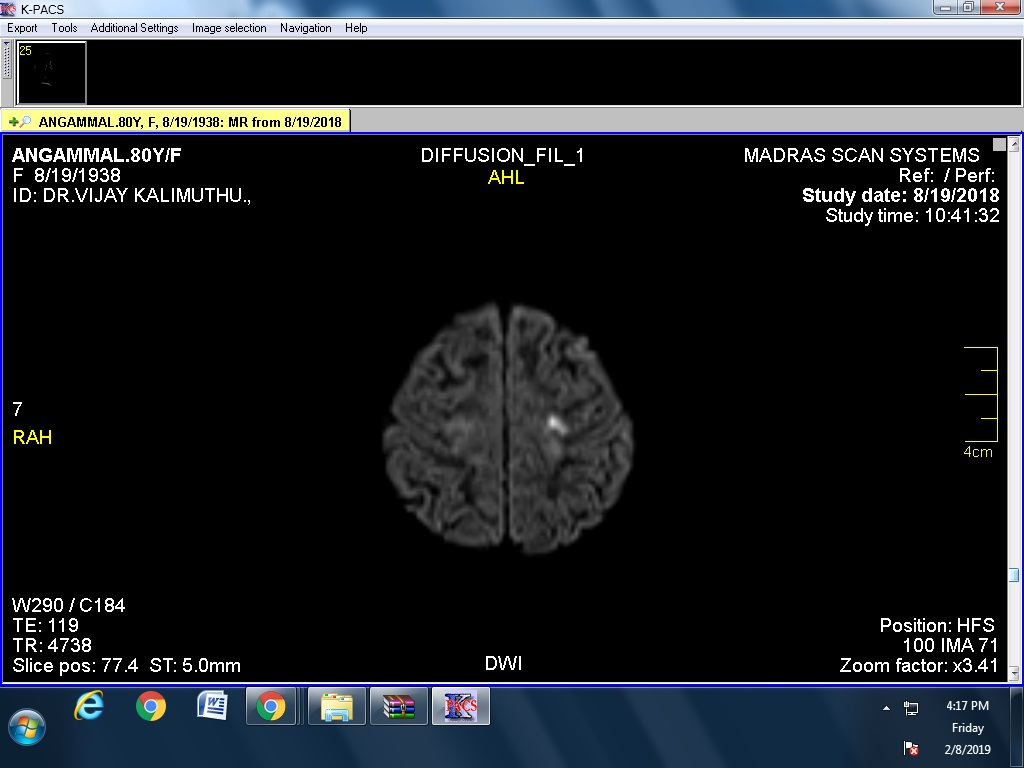

In [47]:
from PIL import Image
a=Image.open("1.jpg")
a

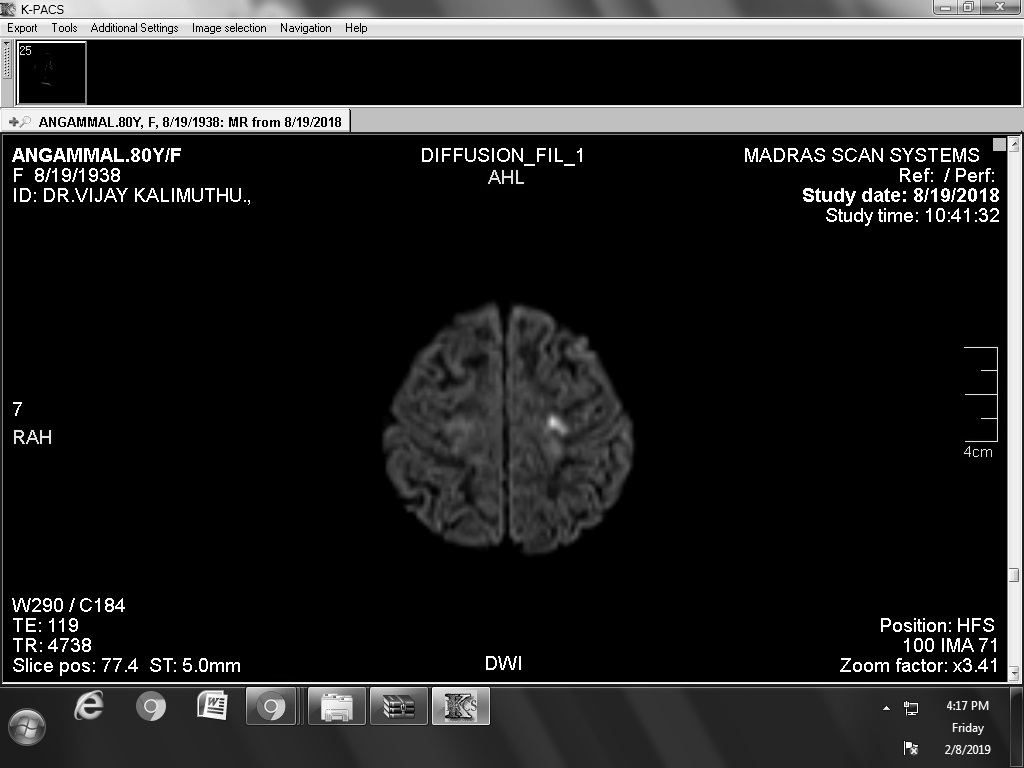

In [48]:
a_gs=Image.open("1.jpg").convert("L")
a_gs

In [49]:
a_gs.getpixel((230, 155))

0

In [50]:
rawdata=a_gs.load()
l=[]
for h in range(410, 440):
  temp=[]
  for w in range(530, 570):
    temp.append(rawdata[w,h])
  l.append(temp)

In [51]:
import pandas as pd
df=pd.DataFrame(l)
pd.set_option("display.max_columns", None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,47,47,48,49,50,52,52,54,55,55,55,55,54,53,51,50,49,49,49,49,50,51,51,48,44,42,42,43,44,45,43,42,39,34,26,20,19,21,24,25
1,47,47,48,50,53,54,55,56,57,56,54,53,53,53,51,51,51,52,53,54,56,58,59,55,50,47,46,46,45,45,43,41,38,32,24,18,18,21,25,27
2,49,49,50,53,56,58,58,59,59,57,54,51,51,52,50,51,53,57,60,62,66,69,70,65,59,54,53,52,51,50,45,43,40,35,27,20,20,23,28,30
3,50,49,51,55,59,61,61,61,60,57,53,50,49,50,50,51,55,61,65,69,74,79,79,73,65,60,58,56,54,52,47,44,40,35,28,22,21,24,30,33
4,51,50,53,58,63,65,65,63,61,58,54,50,49,50,51,53,58,65,72,77,85,92,95,88,79,72,68,64,59,56,51,46,41,36,30,24,24,27,33,37
5,54,52,56,61,67,71,68,65,63,59,55,51,50,50,52,54,61,70,79,88,98,107,114,107,97,88,82,75,69,64,57,51,44,39,34,28,28,32,37,40
6,58,55,58,65,72,75,71,67,64,61,56,51,50,52,55,52,65,75,85,99,111,126,136,126,115,106,97,89,80,72,64,55,46,42,38,34,33,35,39,42
7,62,59,62,69,75,78,73,69,65,62,58,53,52,53,54,53,68,81,93,111,127,144,156,145,133,122,112,102,92,82,71,60,51,46,42,37,36,38,42,44
8,64,61,64,71,77,80,75,70,66,64,62,59,57,57,57,57,73,88,102,123,143,163,177,165,151,140,128,117,103,92,80,68,56,50,46,41,39,40,44,45
9,64,62,64,71,77,80,75,71,67,66,66,65,64,63,62,62,79,95,111,133,156,180,196,183,169,157,144,131,117,104,91,78,64,57,52,46,43,43,44,44


In [52]:
a_rgb=Image.open("1.jpg")
a_gs=Image.open("1.jpg").convert("L")
raw_rgb=a_rgb.load()
raw_gs=a_gs.load()
for h in range(410, 440):
  for w in range(530, 570):
    if raw_gs[w, h]>100:
      raw_rgb[w, h]=(255, 0, 0)

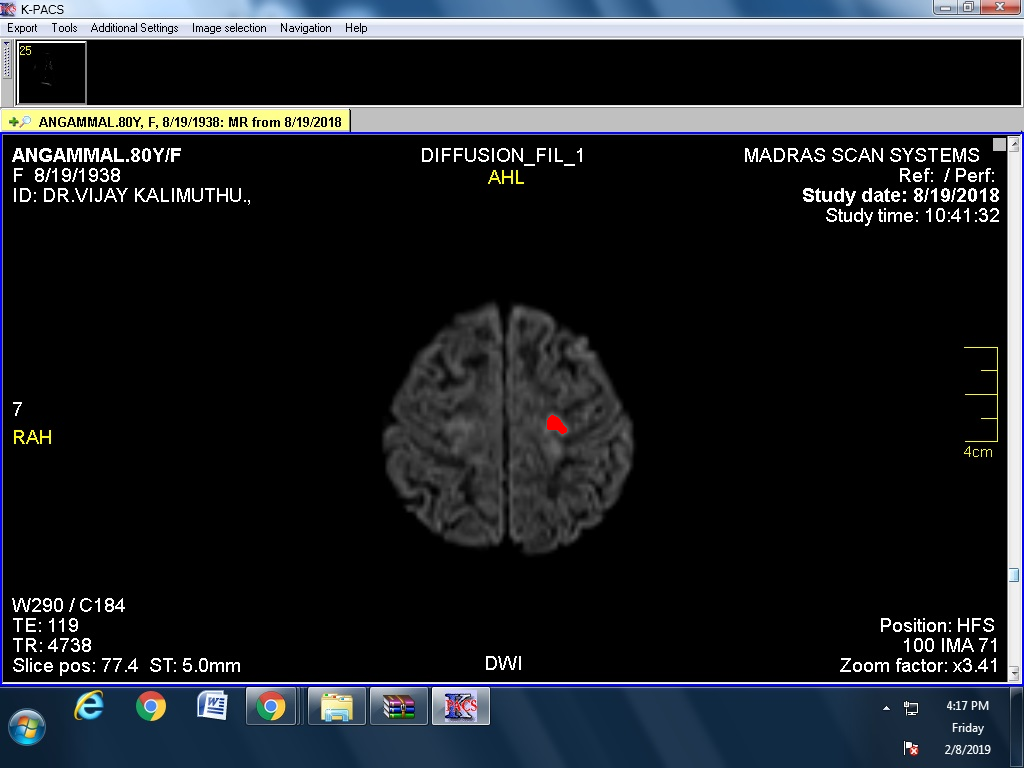

In [53]:
a_rgb

In [54]:
x_gs=Image.open("1.jpg").convert("L")
x_rgb=Image.open("1.jpg")
raw_gs=x_gs.load()
raw_rgb=x_rgb.load()
for h in range(250, 600):
  for w in range(300, 700):
    if raw_gs[w, h]>0:
      raw_rgb[w, h]=(255, 255, 0)
      if raw_gs[w, h]>101:
        raw_rgb[w, h]=(255, 0, 0)

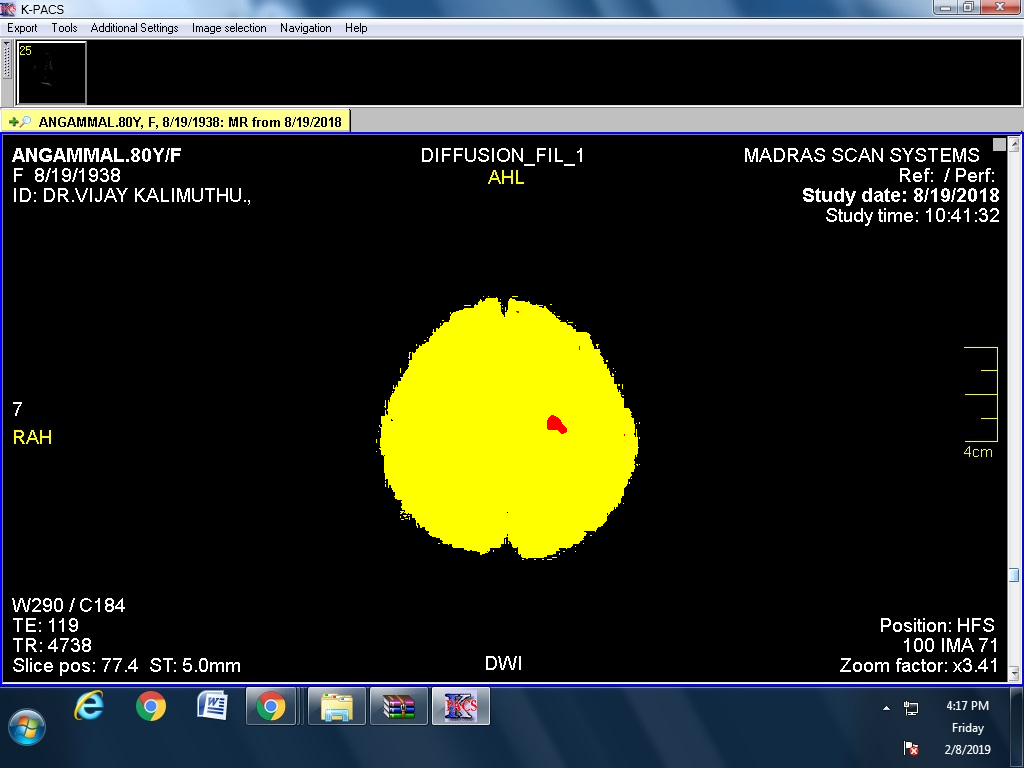

In [55]:
x_rgb

In [56]:
x_gs=Image.open("1.jpg").convert("L")
x_rgb=Image.open("1.jpg")
raw_gs=x_gs.load()
raw_rgb=x_rgb.load()
b=0
c=0
for h in range(250, 600):  #350
  for w in range(300, 700): #400
    if raw_gs[w, h]>0:
      b=b+1
      raw_rgb[w, h]=(255, 255, 0)
      if raw_gs[w, h]>101:
        c=c+1
        raw_rgb[w, h]=(255, 0, 0)
print(f"size of the Brain: {b}")
print(f"size of the clot: {c}")
print(f"Percentage: {(c/b)*100}")

size of the Brain: 50307
size of the clot: 245
Percentage: 0.48700976007315083
